# Lab | Series de tiempo

Repetir los análisis realizados en clase con los datos correspondientes a los años 2020, 2021 y 2022.

- Buscar los datos disponibles en la web:https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-de-peaje-ausa
- Explorar que las columnas sean iguales entre si
- Unir dataframes
- Graficar para detectar outliers
- Realizar análisis temporales de estacionalidad y comparar con los datos de 2017, 2018 y 2019
    - Horaria
    - Diaria
    - Semanal
    
 - Realizar gráficas de predicción con **prophet**
    

#### Instalamos las bibliotecas que vamos a usar.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()

from prophet import Prophet

#### Primero vamos a explorar los datasets

## Flujo vehicular 2017 al 2019

Importamos el csv

In [33]:
data_17_19= pd.read_csv('Data/illia_2017_2019.csv')

In [34]:
data_17_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238869 entries, 0 to 238868
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      238869 non-null  int64 
 1   dia             238869 non-null  object
 2   sentido         238869 non-null  object
 3   tipo_vehiculo   238869 non-null  object
 4   cantidad_pasos  238869 non-null  int64 
 5   fecha           238869 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.9+ MB


In [20]:
data_17_19.head()

,Unnamed: 0,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00


In [27]:
data_17_19.describe()

,Unnamed: 0,cantidad_pasos
count,238869.000000,238869.000000
mean,119434.000000,200.384232
std,68955.685063,403.246904
min,0.000000,1.000000
25%,59717.000000,2.000000
50%,119434.000000,11.000000
75%,179151.000000,104.000000
max,238868.000000,2416.000000


## Flujo vehicular 2020

Importamos el csv

In [17]:
data_2020 = pd.read_csv('Data/flujo-vehicular-2020.csv', sep =',')

In [18]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB


In [19]:
data_2020.head()

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [26]:
data_2020.describe()

,periodo,dia_fecha,hora_inicio,hora_fin,cantidad_pasos
count,2533743.0,2.533743e+06,2.533743e+06,2.533743e+06,2.533743e+06
mean,2020.0,1.574754e+01,1.209809e+01,1.234105e+01,3.442124e+01
std,0.0,8.785705e+00,6.280640e+00,6.366784e+00,1.385131e+02
min,2020.0,1.000000e+00,0.000000e+00,0.000000e+00,9.915789e-01
25%,2020.0,8.000000e+00,7.000000e+00,8.000000e+00,1.000000e+00
50%,2020.0,1.600000e+01,1.200000e+01,1.300000e+01,4.000000e+00
75%,2020.0,2.300000e+01,1.700000e+01,1.800000e+01,1.400000e+01
max,2020.0,3.100000e+01,2.300000e+01,2.300000e+01,3.909796e+03


## Flujo vehicular 2021

Importamos el csv

In [5]:
data_2021 = pd.read_csv('Data/flujo-vehicular-2021.csv', sep =',')

/var/folders/zr/v_qv79zn4xv2dhqwl7djvy340000gn/T/ipykernel_23428/3108720436.py:1: DtypeWarning: Columns (0,2,3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2021 = pd.read_csv('Data/flujo-vehicular-2021.csv', sep =',')


In [7]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029367 entries, 0 to 3029366
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año de Fecha Operativa  object
 1   Cat Cobrada             object
 2   Día de Fecha Operativa  object
 3   Hora HH                 object
 4   ID Peaje                object
 5   Mes de Fecha Operativa  object
 6   Observacion             object
 7   Sentido                 object
 8   Tipo Cobro              object
 9   Pasos                   object
dtypes: object(10)
memory usage: 231.1+ MB


In [21]:
data_2021.head()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19


In [25]:
data_2021.describe()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
count,3029367,3029367,3029367,3029367,3029367,3029367,3029367,3029367,3029367,3029367
unique,3,13,63,49,14,13,29,3,9,5084
top,2021,Auto,23,11,AVE,septiembre,Tag - PosPago,Provincia,Tag,1
freq,2228224,896078,81604,117195,686279,468404,836290,1618014,1456536,781220


# LIMPIEZA DE DATASETS

Lo primero que voy a limpiar son los datasets de 2020 y 2021 para que quede coincidan con el dataset al de *data_2017_19*.

## AÑO 2020

In [28]:
#Quito las columnas que no voy a utilizar, que son las periodo, mes, dia_fech, hora_inicio, observacion.
data_2020.drop(columns = ['periodo','mes','dia_fecha','hora_inicio','observacion'],inplace=True)

In [30]:
data_2020.head()

,fecha,dia,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos
0,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Efectivo,Centro,24.0
1,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Efectivo,Provincia,80.0
2,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Provincia,1.0
3,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Centro,1.0
4,2020-01-01 00:00:00,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Provincia,1.0


In [38]:
#Vamos con la columna fechay vamos a darle formato datetime, y también le unimos la hora_fin como hora:
# Verifico y convierto las fechas al formato correcto
data_2020['fecha'] = pd.to_datetime(data_2020['fecha'], format='%Y-%m-%d', errors='coerce')

# Agregar la columna fecha2 al dataset.
data_2020['fecha2'] = data_2020['fecha'] + pd.to_timedelta(data_2020['hora_fin'], unit='h')


In [39]:
data_2020

,fecha,dia,hora_fin,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha2
0,NaT,Miércoles,1.0,ALBERDI,Auto,Efectivo,Centro,24.0,NaT
1,NaT,Miércoles,1.0,ALBERDI,Auto,Efectivo,Provincia,80.0,NaT
2,NaT,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Provincia,1.0,NaT
3,NaT,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Centro,1.0,NaT
4,NaT,Miércoles,1.0,ALBERDI,Auto,Rec.Deuda,Provincia,1.0,NaT
...,...,...,...,...,...,...,...,...,...
2533738,2020-12-31,Jueves,22.0,DELLEPIANE LINIERSLEPIANE CENTRO,Pesados 6 Ejes,Tag,Centro,1.0,2020-12-31 22:00:00
2533739,2020-12-31,Jueves,22.0,DELLEPIANE LINIERS,Pesados 6 Ejes,Tag,Provincia,1.0,2020-12-31 22:00:00
2533740,2020-12-31,Jueves,22.0,ILP,Pesados 6 Ejes,Tag,Centro,1.0,2020-12-31 22:00:00
2533741,2020-12-31,Jueves,23.0,ILP,Pesados 6 Ejes,Tag,Centro,2.0,2020-12-31 23:00:00


In [40]:
#Ahora quito las columnas fecha y hora_fin ya que ahora tenemos la columna fecha2
data_2020.drop(columns=['fecha','hora_fin'], inplace = True)

In [41]:
data_2020

,dia,estacion,tipo_vehiculo,forma_pago,sentido,cantidad_pasos,fecha2
0,Miércoles,ALBERDI,Auto,Efectivo,Centro,24.0,NaT
1,Miércoles,ALBERDI,Auto,Efectivo,Provincia,80.0,NaT
2,Miércoles,ALBERDI,Auto,Rec.Deuda,Provincia,1.0,NaT
3,Miércoles,ALBERDI,Auto,Rec.Deuda,Centro,1.0,NaT
4,Miércoles,ALBERDI,Auto,Rec.Deuda,Provincia,1.0,NaT
...,...,...,...,...,...,...,...
2533738,Jueves,DELLEPIANE LINIERSLEPIANE CENTRO,Pesados 6 Ejes,Tag,Centro,1.0,2020-12-31 22:00:00
2533739,Jueves,DELLEPIANE LINIERS,Pesados 6 Ejes,Tag,Provincia,1.0,2020-12-31 22:00:00
2533740,Jueves,ILP,Pesados 6 Ejes,Tag,Centro,1.0,2020-12-31 22:00:00
2533741,Jueves,ILP,Pesados 6 Ejes,Tag,Centro,2.0,2020-12-31 23:00:00


In [42]:
#Vamos a ver que valores tenemos en la columna estacion
print(data_2020['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']


In [43]:
#Vamos a ver que valores tenemos en la columna forma_pago
print(data_2020['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']


In [44]:
#Vamos a ver que valores tenemos en la columna tipo_vehículo
print(data_2020['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']


In [45]:
#Me voy a quedar con la estación Illia y la forma de pago Efectivo, lo voy a hacer con una máscara.
mask=np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago=='Efectivo')
data_2020=data_2020[mask]

In [47]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52374 entries, 52 to 2533497
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dia             52374 non-null  object        
 1   estacion        52374 non-null  object        
 2   tipo_vehiculo   52374 non-null  object        
 3   forma_pago      52374 non-null  object        
 4   sentido         52374 non-null  object        
 5   cantidad_pasos  52374 non-null  float64       
 6   fecha2          35658 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.2+ MB


In [48]:
# Vamos a ver que valores tenemos en la columna estacion
print(data_2020['estacion'].unique())

['ILLIA']


In [49]:
# Vamos a ver que valores tenemos en la columna forma_pago
print(data_2020['forma_pago'].unique())

['Efectivo']


In [50]:
# Quito las columnas 'estación' y 'forma de pago', ya que no nos van a hacer falta:
data_2020.drop(columns=['estacion','forma_pago'], inplace = True)

/var/folders/zr/v_qv79zn4xv2dhqwl7djvy340000gn/T/ipykernel_23428/1135062607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020.drop(columns=['estacion','forma_pago'], inplace = True)


In [51]:
data_2020

,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha2
52,Miércoles,Auto,Centro,326.0,NaT
53,Miércoles,Auto,Provincia,319.0,NaT
134,Miércoles,Auto,Centro,199.0,NaT
135,Miércoles,Auto,Provincia,180.0,NaT
202,Miércoles,Auto,Centro,114.0,NaT
...,...,...,...,...,...
2532216,Jueves,Pesados 6 Ejes,Provincia,1.0,2020-12-24 12:00:00
2532227,Jueves,Pesados 6 Ejes,Provincia,1.0,2020-12-24 13:00:00
2532271,Jueves,Pesados 6 Ejes,Centro,1.0,2020-12-24 18:00:00
2532928,Lunes,Pesados 6 Ejes,Provincia,1.0,2020-12-28 13:00:00


In [52]:
# Ronombro la columna fecha2 por fecha
data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data_2020.head()

/var/folders/zr/v_qv79zn4xv2dhqwl7djvy340000gn/T/ipykernel_23428/261098550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020.rename(columns = {'fecha2':'fecha'}, inplace = True)


,dia,tipo_vehiculo,sentido,cantidad_pasos,fecha
52,Miércoles,Auto,Centro,326.0,NaT
53,Miércoles,Auto,Provincia,319.0,NaT
134,Miércoles,Auto,Centro,199.0,NaT
135,Miércoles,Auto,Provincia,180.0,NaT
202,Miércoles,Auto,Centro,114.0,NaT


In [53]:
#Reordeno las columnas para que esten igual que en el dataset 2017_19
columnas_ordenadas = ['dia','sentido','tipo_vehiculo','cantidad_pasos','fecha']
data_2020 = data_2020[columnas_ordenadas]

In [54]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52374 entries, 52 to 2533497
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   dia             52374 non-null  object        
 1   sentido         52374 non-null  object        
 2   tipo_vehiculo   52374 non-null  object        
 3   cantidad_pasos  52374 non-null  float64       
 4   fecha           35658 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.4+ MB


In [57]:
#Por útlimo voy a ordenar el dataset por fecha.
data_2020.sort_values('fecha', inplace = True)
data_2020.reset_index(drop=True, inplace = True)
data_2020.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Lunes,Centro,Auto,1.0,2020-05-11 21:00:00
1,Martes,Centro,Moto,2.0,2020-05-19 00:00:00
2,Martes,Provincia,Moto,4.0,2020-05-19 00:00:00
3,Martes,Provincia,Pago Doble Auto,1.0,2020-05-19 00:00:00
4,Martes,Centro,Auto,24.0,2020-05-19 00:00:00


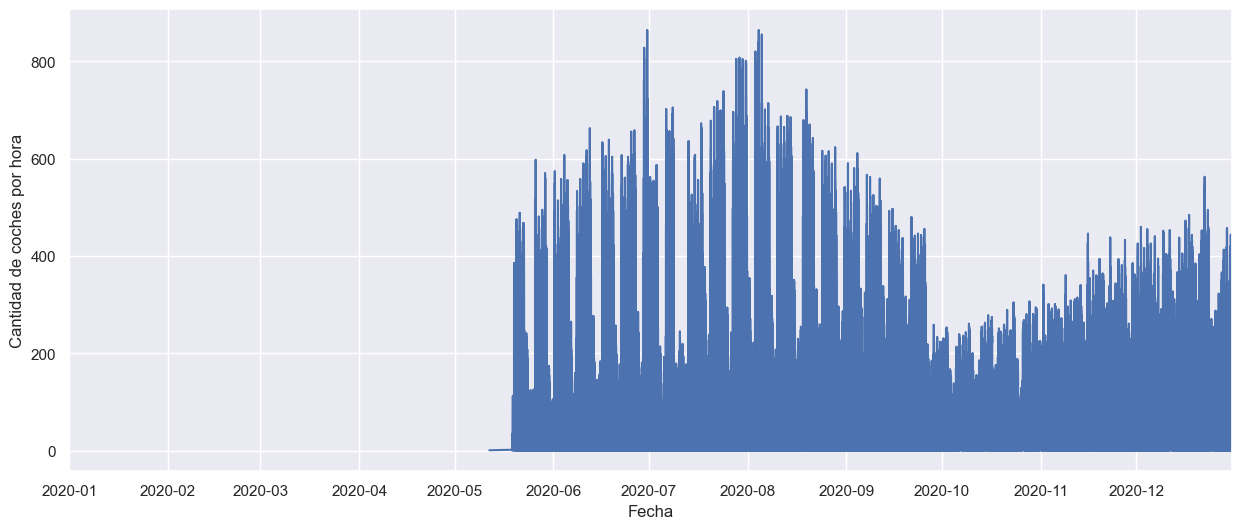

In [63]:
#Graficamos nuestros datos actuales.
plt.figure(figsize = (15,6))
plt.plot(data_2020.fecha, data_2020.cantidad_pasos)
plt.xlim(datetime.date(2020,1,1), datetime.date(2020,12,31))
plt.xlabel('Fecha')
plt.ylabel('Cantidad de coches por hora')
plt.show()

Pueden observar que la figura es ruidosa y poco clara. ¿A qué se deberá?

Los datos están tomados con una frecuencia horaria. Eso produce una saturación del gráfico. Pandas nos permite *resamplear* el dataset de forma tal de llevar los datos en frecuencia horaria a otra frecuencia. Por ejemplo, diaria.

In [59]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = data_2020.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(235, 4)


,dia,sentido,tipo_vehiculo,cantidad_pasos
fecha,,,,
2020-05-11,Lunes,Centro,Auto,1.0
2020-05-12,0,0,0,0.0
2020-05-13,0,0,0,0.0
2020-05-14,0,0,0,0.0
2020-05-15,0,0,0,0.0


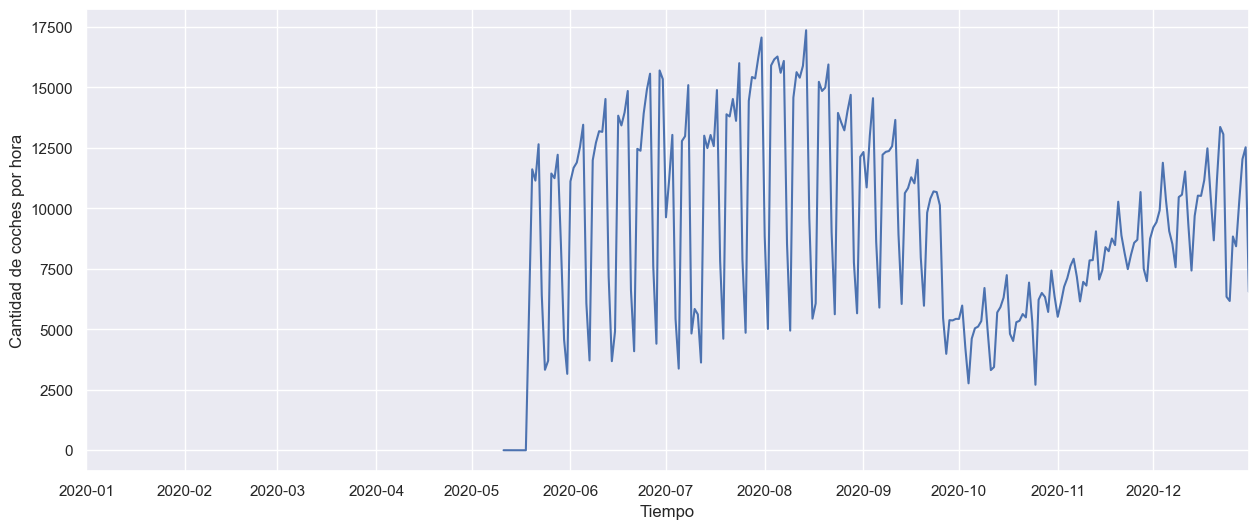

In [61]:
#Volvemos a graficar nuestra serie de tiempo, esta vez por día para el año 2020
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2020,1,1), datetime.date(2020,12,31))
plt.xlabel('Fecha')
plt.ylabel('Cantidad de coches por hora')
plt.show()

La falta de datos es debido a que fue el año del COVID.

## AÑO 2021

In [65]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029367 entries, 0 to 3029366
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año de Fecha Operativa  object
 1   Cat Cobrada             object
 2   Día de Fecha Operativa  object
 3   Hora HH                 object
 4   ID Peaje                object
 5   Mes de Fecha Operativa  object
 6   Observacion             object
 7   Sentido                 object
 8   Tipo Cobro              object
 9   Pasos                   object
dtypes: object(10)
memory usage: 231.1+ MB


In [66]:
data_2021.head()

,Año de Fecha Operativa,Cat Cobrada,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,Observacion,Sentido,Tipo Cobro,Pasos
0,2021,Auto,1,0,ALB,abril,Efectivo,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Mercado Pago,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Mercado Pago OCR,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Paso en infracción con Multa LPR,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Tag - PosPago,Centro,Tag,19


In [67]:
#Voy a ver los valores de la columna Cat Cobrada
print(data_2021['Cat Cobrada'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago doble Moto' 'Pesados 2 Ejes'
 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes' 'Pesados 6 Ejes'
 'Total' 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago Doble Auto']


In [68]:
#Voy a ver los valores de la columna ID Peaje
print(data_2021['ID Peaje'].unique())

['ALB' 'AVE' 'DEC' 'DEL' 'ILL' 'ILP' 'PB1' 'PB2' 'PB3' 'PB4' 'RET' 'SAL'
 'SAR' 'Total']


In [69]:
#Voy a ver los valores de la columna Observacion
print(data_2021['Observacion'].unique())

['Efectivo' 'Mercado Pago' 'Mercado Pago OCR'
 'Paso en infracción con Multa LPR' 'Tag - PosPago' 'Tag - PosPago OCR'
 'Exento - Reglamento' 'Paso en Infracción' 'T.Magnética Disc.'
 'Violación - Normal' 'Exento - Otros motivos' 'Tag - Exento'
 'Exento - Demora en cobro' 'Tag - PrePago OCR'
 'Paso en Infracción con Multa' 'Violación - Rebote'
 'Metrobus no hab. TAG pospago' 'Metrobus no hab. OCR pospago'
 'Metrobus no hab. TAG Mercado Pago' 'Paso a facturar - (colectivo)'
 'Violación - Repetitiva' 'Metrobus no hab. OCR Mercado Pago'
 'Tag - PrePago' 'Violación - Via Liberada' 'Violación - Vía Cerrada'
 'Total' 'Metrobus no hab. TAG prepago' 'Metrobus no hab. OCR prepago'
 'Obs CPP']


In [70]:
#Voy a ver los valores de la columna Tipo Cobro
print(data_2021['Tipo Cobro'].unique())

['Efectivo' 'Mercado Pago' 'Rec.Deuda' 'Tag' 'Exento' 'Tarjeta Magnética'
 'Violación' 'Total' 'CPP']


In [71]:
#Voy a eliminar la varibale observación ya que no la voy a usar.
data_2021.drop(columns = ['Observacion'],inplace=True)

In [73]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029367 entries, 0 to 3029366
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Año de Fecha Operativa  object
 1   Cat Cobrada             object
 2   Día de Fecha Operativa  object
 3   Hora HH                 object
 4   ID Peaje                object
 5   Mes de Fecha Operativa  object
 6   Sentido                 object
 7   Tipo Cobro              object
 8   Pasos                   object
dtypes: object(9)
memory usage: 208.0+ MB


In [76]:
#Voy a renombrar las columnas.
data_2021.rename(columns={'Cat Cobrada':'tipo_vehiculo', 'Pasos':'cantidad_pasos', 'Sentido':'sentido'}, inplace=True)

In [77]:
data_2021.head()

,Año de Fecha Operativa,tipo_vehiculo,Día de Fecha Operativa,Hora HH,ID Peaje,Mes de Fecha Operativa,sentido,Tipo Cobro,cantidad_pasos
0,2021,Auto,1,0,ALB,abril,Provincia,Efectivo,7
1,2021,Auto,1,0,ALB,abril,Provincia,Mercado Pago,4
2,2021,Auto,1,0,ALB,abril,Centro,Mercado Pago,1
3,2021,Auto,1,0,ALB,abril,Provincia,Rec.Deuda,1
4,2021,Auto,1,0,ALB,abril,Centro,Tag,19


In [80]:
# Creo que la manera más sencilla siendo meses es crear un diccionario para asignar a los nombres de meses su número correspondiente.
mapeo_meses = {
    'enero': '01',
    'febrero': '02',
    'marzo': '03',
    'abril': '04',
    'mayo': '05',
    'junio': '06',
    'julio': '07',
    'agosto': '08',
    'septiembre': '09',
    'octubre': '10',
    'noviembre': '11',
    'diciembre': '12'
}

In [81]:
# Posteriorment voy a convertir los nombres de los meses y asegurar de que todas las columnas de la concatenación sean tipo strings.
data_2021['Mes de Fecha Operativa'] = data_2021['Mes de Fecha Operativa'].map(mapeo_meses)
data_2021 = data_2021.astype({
    'Año de Fecha Operativa': 'str',
    'Día de Fecha Operativa': 'str',
    'Hora HH': 'str',
    'Mes de Fecha Operativa': 'str'
})

In [83]:
# Voy a filtrar las filas no válidas.
columnas_validas = data_2021[data_2021[['Año de Fecha Operativa', 'Día de Fecha Operativa', 'Hora HH', 'Mes de Fecha Operativa']].apply(lambda x: x.str.isdigit()).all(axis=1)].copy()
#También voy a combinar columnas en formato datetime.
columnas_validas['fecha'] = pd.to_datetime(columnas_validas['Año de Fecha Operativa'] + '-' + columnas_validas['Mes de Fecha Operativa'] + '-' + columnas_validas['Día de Fecha Operativa'] + ' ' + columnas_validas['Hora HH'] + ':00:00',format='%Y-%m-%d %H:%M:%S')

In [85]:
# Voy a eliminar las columnas que no neceistamos y añadir una columna con nombre del día en español.
data_2021 = columnas_validas.drop(columns=['Año de Fecha Operativa', 'Día de Fecha Operativa', 'Hora HH', 'Mes de Fecha Operativa'])
data_2021['dia'] = data_2021['fecha'].dt.day_name().map({
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
})

In [86]:
# Renombro columnas.
data_2021.rename(columns={'ID Peaje': 'id', 'Tipo Cobro': 'cobro'}, inplace=True)
# Aplico filtro
data_2021 = data_2021[(data_2021['id'] == 'ILL') & (data_2021['cobro'] == 'Efectivo')]

In [87]:
# Voy a dropear columnas y reordenarlas.
data_2021 = data_2021.drop(columns=['id', 'cobro']).reindex(columns=['dia', 'sentido', 'tipo_vehiculo', 'cantidad_pasos', 'fecha'])
data_2021.sort_values('fecha', inplace=True)
data_2021.reset_index(drop=True, inplace=True)

In [88]:
# Paso la variable cantidad_pasos a numérica
data_2021['cantidad_pasos'] = pd.to_numeric(data_2021['cantidad_pasos'], errors='coerce')

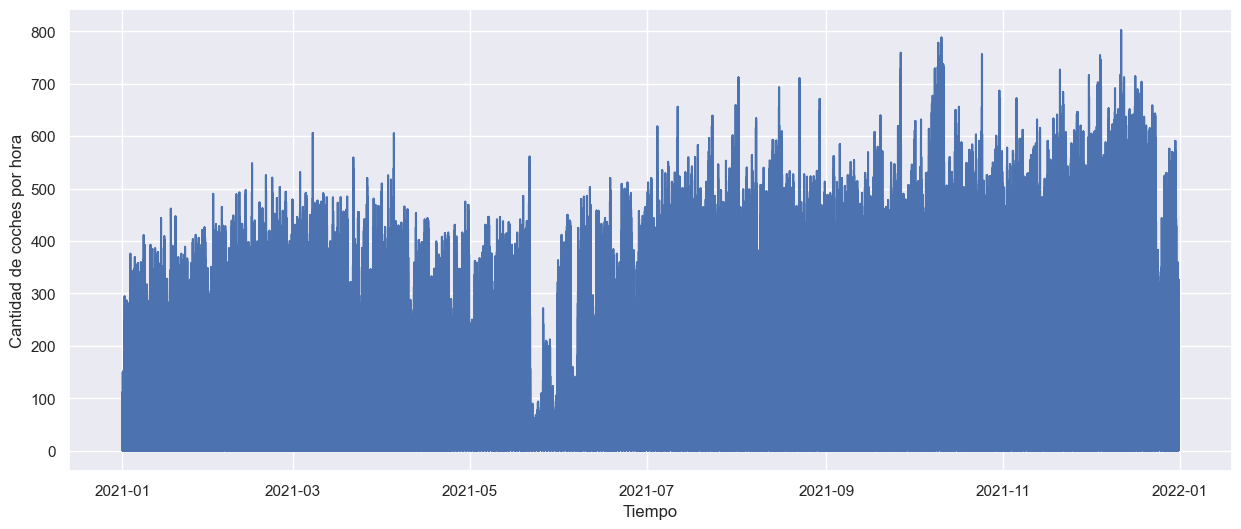

In [89]:
# Realizo el grafico.
plt.figure(figsize=(15,6))
plt.plot(data_2021['fecha'], data_2021['cantidad_pasos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de coches por hora')
plt.show()

In [90]:
# Resampleamo los datos por día.
diario = data_2021.resample('D', on='fecha').sum()

In [93]:
diario.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos
fecha,,,,
2021-01-01,ViernesViernesViernesViernesViernesViernesVier...,ProvinciaCentroProvinciaCentroCentroCentroProv...,MotoMotoAutoAutoPesados 2 EjesMotoMotoAutoAuto...,5788
2021-01-02,SábadoSábadoSábadoSábadoSábadoSábadoSábadoSába...,CentroCentroProvinciaCentroProvinciaProvinciaC...,MotoAutoAutoPesados 2 EjesMotoPesados 2 EjesPe...,8500
2021-01-03,DomingoDomingoDomingoDomingoDomingoDomingoDomi...,ProvinciaCentroProvinciaCentroProvinciaProvinc...,Pesados 2 EjesMotoMotoAutoAutoAuto con trailer...,9241
2021-01-04,LunesLunesLunesLunesLunesLunesLunesLunesLunesL...,CentroProvinciaCentroProvinciaCentroProvinciaP...,Pesados 5 EjesMotoAutoAutoMotoPesados 2 EjesMo...,9213
2021-01-05,MartesMartesMartesMartesMartesMartesMartesMart...,CentroProvinciaProvinciaCentroProvinciaCentroC...,AutoAutoMotoMotoPesados 2 EjesPesados 2 EjesPe...,9180


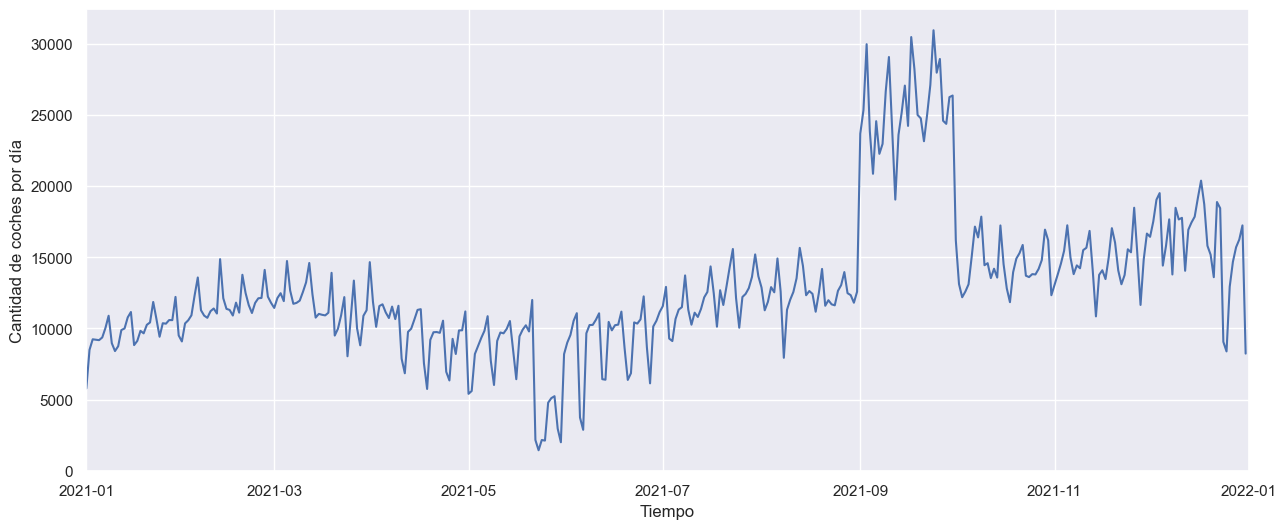

In [91]:
#Grafica serie de tiempo
plt.figure(figsize=(15,6))
plt.plot(diario.index, diario['cantidad_pasos'])
plt.xlim(pd.Timestamp(2021,1,1), pd.Timestamp(2022,1,1))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de coches por día')
plt.show()

In [94]:
#Seguidamente voy concatenar los datasets del 2020 y 2021:
data_2020_21 = pd.concat([data_2020, data_2021])

In [96]:
data_2020_21.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Lunes,Centro,Auto,1.0,2020-05-11 21:00:00
1,Martes,Centro,Moto,2.0,2020-05-19 00:00:00
2,Martes,Provincia,Moto,4.0,2020-05-19 00:00:00
3,Martes,Provincia,Pago Doble Auto,1.0,2020-05-19 00:00:00
4,Martes,Centro,Auto,24.0,2020-05-19 00:00:00


In [98]:
data_2020_21.shape

(106232, 5)

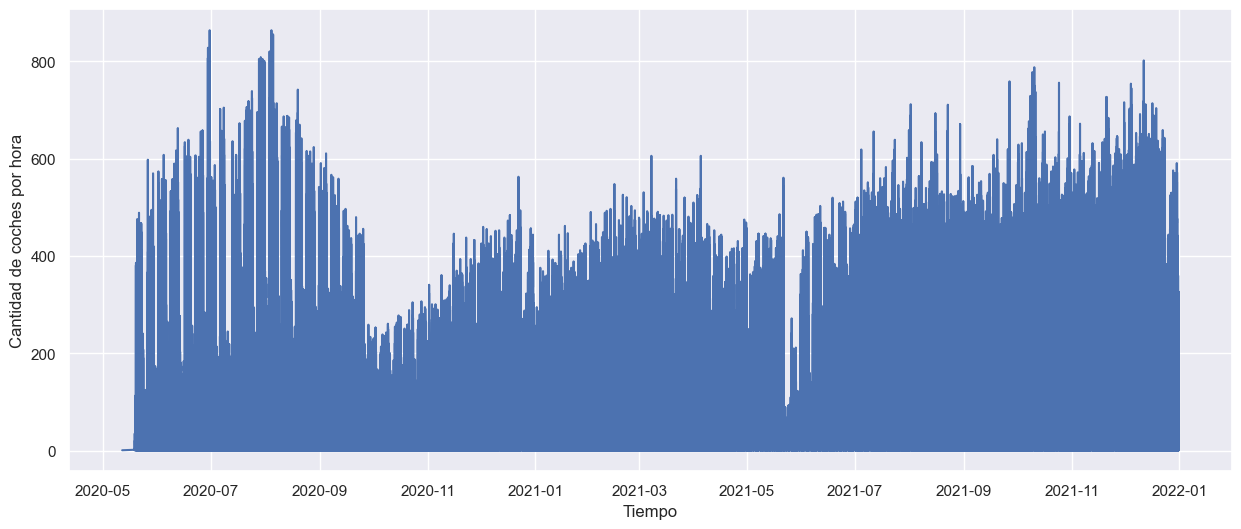

In [99]:
plt.figure(figsize = (15,6))
plt.plot(data_2020_21.fecha, data_2020_21.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de coches por hora')
plt.show()

In [101]:
diario = data_2020_21.resample('D', on = 'fecha').sum()

In [102]:
diario.shape

(600, 4)

In [104]:
diario.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2020-05-11 to 2021-12-31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dia             600 non-null    object 
 1   sentido         600 non-null    object 
 2   tipo_vehiculo   600 non-null    object 
 3   cantidad_pasos  600 non-null    float64
dtypes: float64(1), object(3)
memory usage: 23.4+ KB


In [106]:
diario.tail()

,dia,sentido,tipo_vehiculo,cantidad_pasos
fecha,,,,
2021-12-27,LunesLunesLunesLunesLunesLunesLunesLunesLunesL...,ProvinciaCentroCentroProvinciaCentroCentroProv...,AutoMotoPesados 5 EjesMotoAutoPesados 2 EjesPe...,14686.0
2021-12-28,MartesMartesMartesMartesMartesMartesMartesMart...,CentroCentroProvinciaProvinciaCentroProvinciaC...,AutoPesados 2 EjesMotoAutoPesados 3 EjesPesado...,15709.0
2021-12-29,MiércolesMiércolesMiércolesMiércolesMiércolesM...,ProvinciaCentroProvinciaCentroProvinciaCentroC...,Pesados 2 EjesPesados 2 EjesAutoMotoMotoPesado...,16248.0
2021-12-30,JuevesJuevesJuevesJuevesJuevesJuevesJuevesJuev...,ProvinciaCentroProvinciaCentroCentroCentroProv...,MotoMotoPesados 2 EjesPesados 2 EjesPesados 3 ...,17242.0
2021-12-31,ViernesViernesViernesViernesViernesViernesVier...,CentroProvinciaCentroProvinciaProvinciaCentroP...,Pesados 2 EjesPesados 2 EjesAutoAutoMotoMotoMo...,8236.0


In [108]:
#Voya a eliminar las columnas que no voy a ausar
diario.drop(columns = ['dia','sentido','tipo_vehiculo',], inplace = True)

KeyError: "['dia', 'sentido', 'tipo_vehiculo'] not found in axis"

In [110]:
diario

,cantidad_pasos
fecha,
2020-05-11,1.0
2020-05-12,0.0
2020-05-13,0.0
2020-05-14,0.0
2020-05-15,0.0
...,...
2021-12-27,14686.0
2021-12-28,15709.0
2021-12-29,16248.0


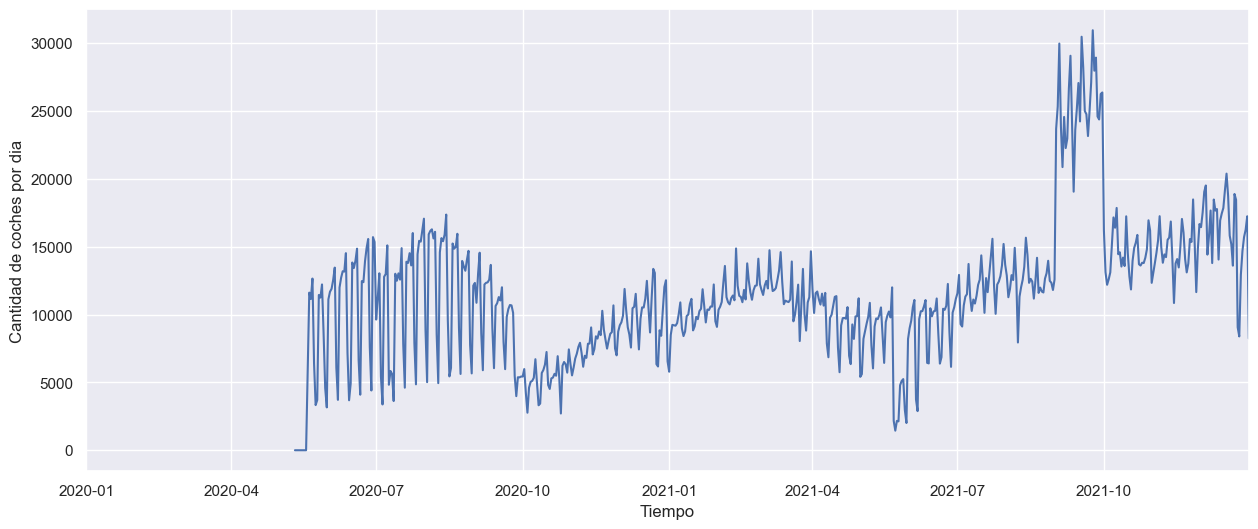

In [111]:
#Realizo el gráfico
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2020,1,1), datetime.date(2021,12,31))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de coches por dia')
plt.show()

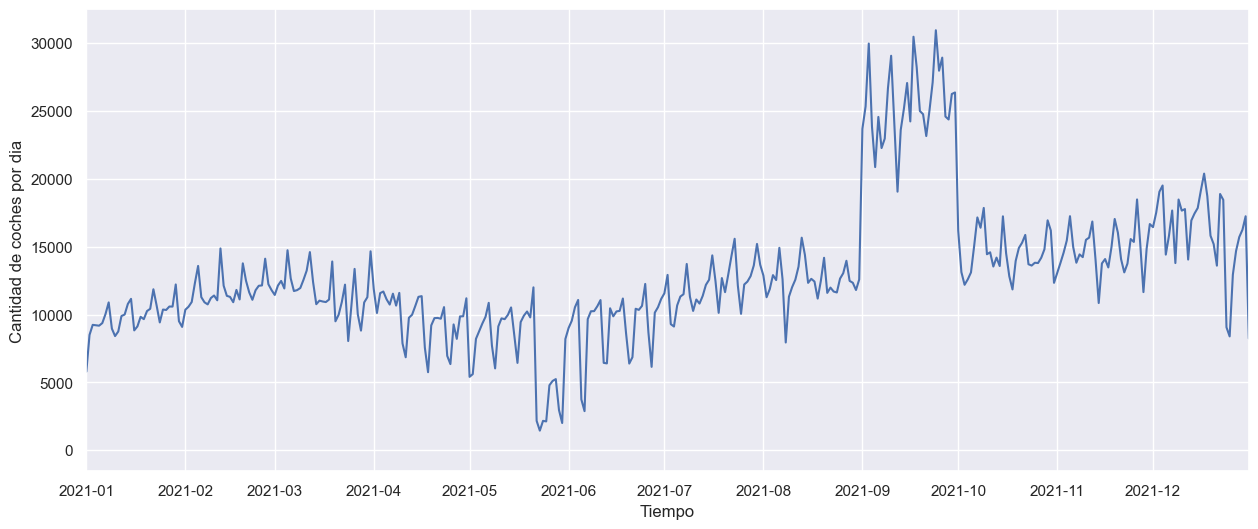

In [112]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlim(datetime.date(2021,1,1), datetime.date(2021,12,31))
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de coches por dia')
plt.show()

In [113]:
#Voy a cambiar los datos a frequencia semanal
semanal = data_2020_21.resample('W', on = 'fecha').sum()

In [114]:
#Voy a eliminar las columnas que no me interesan de dataframe
semanal.drop(columns = ['dia','sentido','tipo_vehiculo',], inplace = True)

In [115]:
semanal.shape

(86, 1)

In [116]:
semanal.head()

,cantidad_pasos
fecha,
2020-05-17,1.0
2020-05-24,50883.0
2020-05-31,54914.0
2020-06-07,70493.0
2020-06-14,76452.0


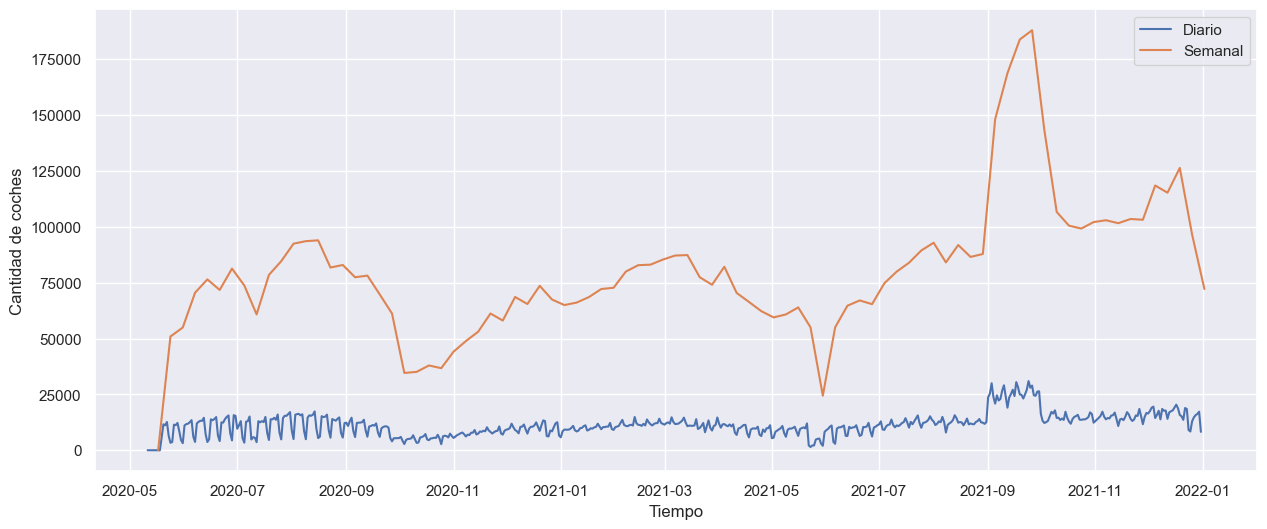

In [117]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Diario')
plt.plot(semanal.index, semanal.cantidad_pasos, label = 'Semanal')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de coches')
plt.show()

In [118]:
# Voy a agrupar por horario usando el promedio:
horario = data_2020_21.copy()
horario.drop(columns = ['dia','sentido','tipo_vehiculo',], inplace = True)
hora = pd.DatetimeIndex(horario.fecha)
horario

,cantidad_pasos,fecha
0,1.0,2020-05-11 21:00:00
1,2.0,2020-05-19 00:00:00
2,4.0,2020-05-19 00:00:00
3,1.0,2020-05-19 00:00:00
4,24.0,2020-05-19 00:00:00
...,...,...
53853,10.0,2021-12-31 19:00:00
53854,264.0,2021-12-31 19:00:00
53855,264.0,2021-12-31 19:00:00
53856,2.0,2021-12-31 19:00:00


In [120]:
agrupar_horario = horario.groupby(hora.hour).mean()
agrupar_horario.head()

,cantidad_pasos,fecha
fecha,,
0.0,22.952231,2020-11-10 02:37:59.055118080
1.0,19.723095,2020-11-06 05:19:41.151832320
2.0,16.157963,2020-11-08 05:14:34.151435776
3.0,11.913758,2020-11-07 11:46:19.466119168
4.0,11.149254,2020-11-10 21:00:53.731343360


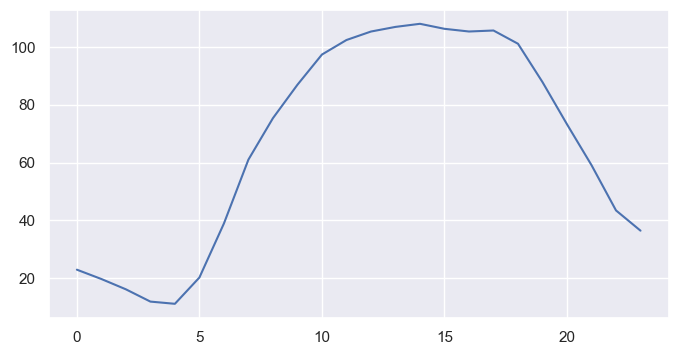

In [121]:
#$ealizamos el grafico
plt.figure(figsize = (8,4))
plt.plot(agrupar_horario.index, agrupar_horario.cantidad_pasos)
plt.show()

In [122]:
#Voy a calcular el promedio móvil diario con una ventana de 5 días centrada.
diario_promedio = diario.rolling(5, win_type='triang', center=True).mean()

In [123]:
#Voy a calcular el promedio móvil semanal con una ventana de 2 semanas centrada.
semanal_promedio = semanal.rolling(2, win_type='triang', center=True).mean()

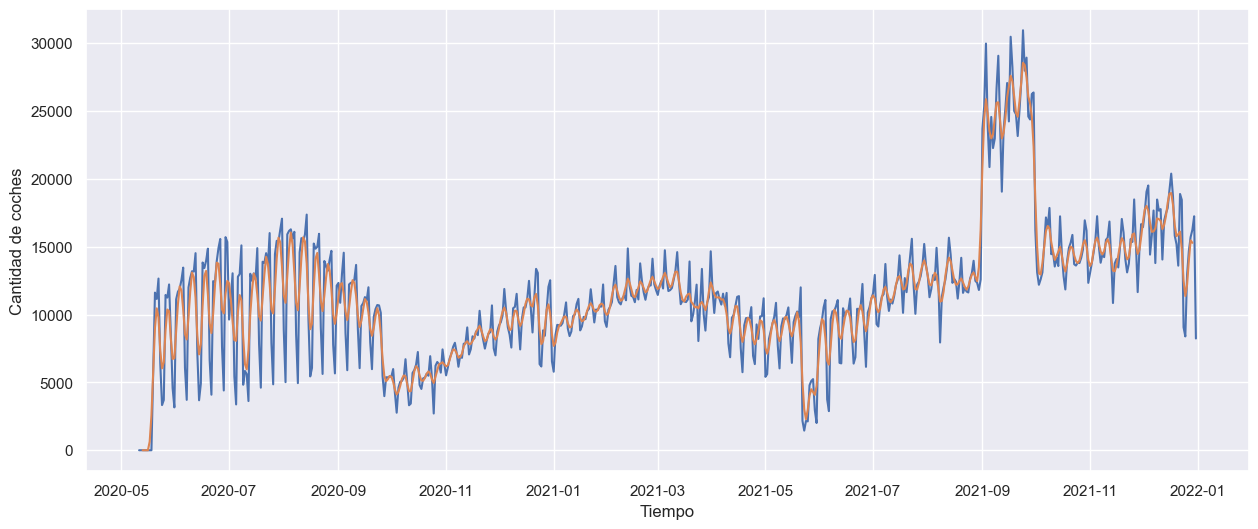

In [124]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Diario')
plt.plot(diario_promedio.index, diario_promedio.cantidad_pasos, label = 'Diario promedio')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de coches')
plt.show()

## PROPHET

In [125]:
df = diario.reset_index()
df.rename(columns = {'fecha':'ds', 'cantidad_pasos':'y'}, inplace = True)
df

,ds,y
0,2020-05-11,1.0
1,2020-05-12,0.0
2,2020-05-13,0.0
3,2020-05-14,0.0
4,2020-05-15,0.0
...,...,...
595,2021-12-27,14686.0
596,2021-12-28,15709.0
597,2021-12-29,16248.0
598,2021-12-30,17242.0


In [126]:
#Fiteamos el modelo:
m = Prophet()
m.fit(df)

23:55:47 - cmdstanpy - INFO - Chain [1] start processing
23:55:47 - cmdstanpy - INFO - Chain [1] done processing


In [127]:
futuro = m.make_future_dataframe(periods=365)
futuro.tail()

,ds
960,2022-12-27
961,2022-12-28
962,2022-12-29
963,2022-12-30
964,2022-12-31


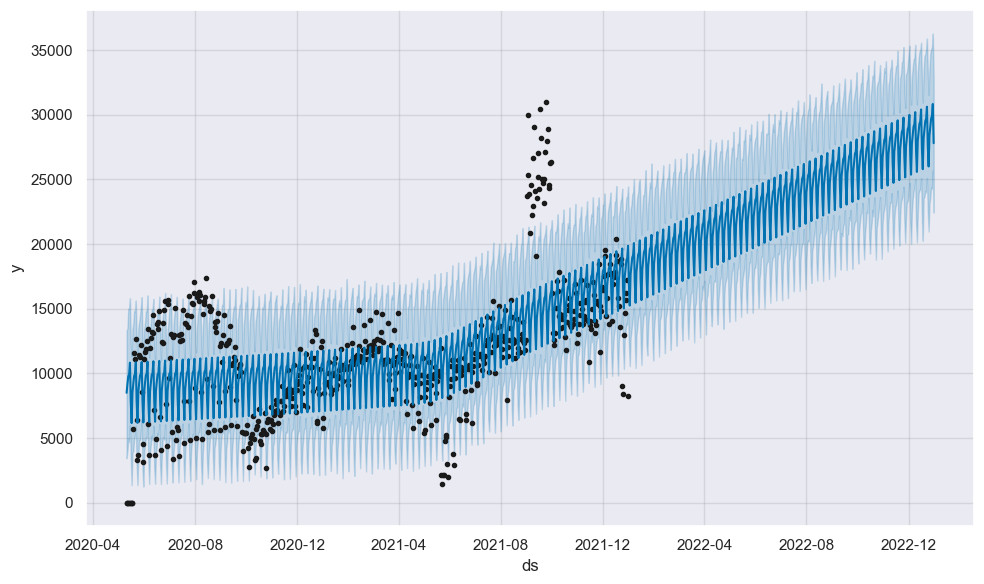

In [128]:
forecast = m.predict(futuro)
figura_1 = m.plot(forecast)

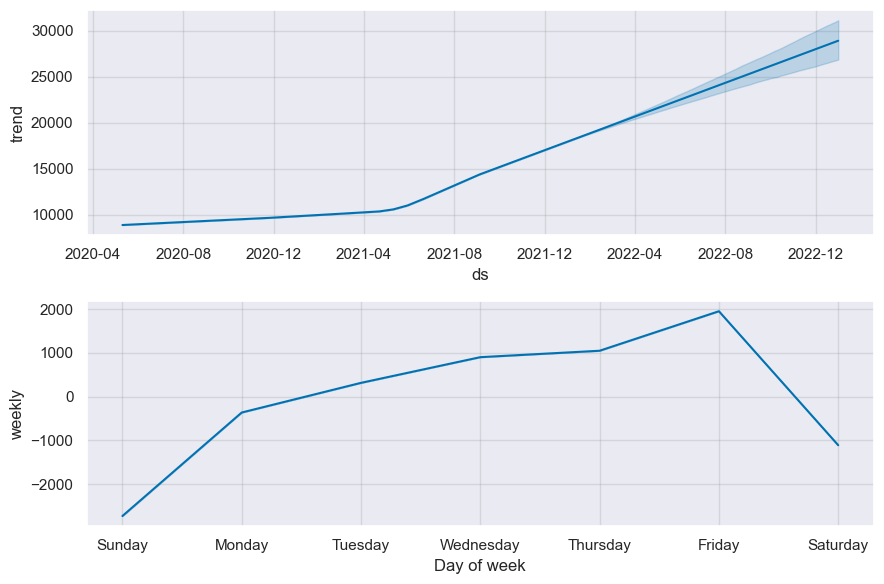

In [129]:
figura_2 = m.plot_components(forecast)